In [1]:
from periomod.data import StaticProcessEngine

engine = StaticProcessEngine()
df = engine.load_data()
df = engine.process_data(df=df)
engine.save_data(df=df)

Initial number of patients: 746
Initial number of rows: 100950
Number of unique patients removed: 7
Number of rows removed: 1026
Remaining number of patients: 739
Remaining number of rows: 99924



/Users/toby/pa-modeling/periomod/data/_preprocessing.py:232: UserWarning: Missing values found: 
bodymassindex              1560
periofamilyhistory        10056
diabetes                    666
smokingtype               38220
cigarettenumber           85164
stresslvl                  2502
boprevaluation              567
percussion-sensitivity      222
sensitivity                 312
furcationbaseline         88304
recbaseline                9878
plaque                     2513
bop                         633
dtype: int64
  self.create_tooth_features(self.impute_missing_values(df=df))


No missing values after imputation.
Data saved to /Users/toby/pa-modeling/data/processed/base/processed_data.csv


In [5]:
from periomod.wrapper import BenchmarkWrapper, EvaluatorWrapper

wrapper = BenchmarkWrapper(
    task="pocketclosureinf",
    encodings=["one_hot"],
    learners=["xgb", "lr"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo"],
    criteria=["f1"],
    sampling=[None],
    factor=2,
    n_configs=3,
    n_jobs=-1,
)

baseline = wrapper.baseline()
benchmark, learners = wrapper.wrapped_benchmark()

In [6]:
baseline

,Model,Encoding,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,Dummy Classifier,one_hot,0.000000,0.000000,0.000000,0.621685,0.235741,0.500000,"[[0, 1441], [0, 2368]]",None
1,Logistic Regression,one_hot,0.540854,0.672165,0.452464,0.709373,0.193864,0.743512,"[[652, 789], [318, 2050]]",None
2,Random Forest,one_hot,0.517902,0.647242,0.431645,0.695983,0.201294,0.723249,"[[622, 819], [339, 2029]]",None


In [7]:
benchmark

,Task,Learner,Tuning,HPO,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,pocketclosureinf,xgb,holdout,hebo,f1,None,2,0.6034,0.5131,0.7321,0.6359,0.2047,0.7188,"[[1055, 386], [1001, 1367]]",0.70
1,pocketclosureinf,lr,holdout,hebo,f1,None,2,0.6217,0.5304,0.7509,0.6542,0.2106,0.7433,"[[1082, 359], [958, 1410]]",0.53


In [8]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="f1",
    aggregate=True,
)

In [9]:
evaluator.average_over_splits()

,Task,Learner,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Best Threshold,Confusion Matrix
0,pocketclosureinf,lr,f1,None,2.0,0.6064,0.5275,0.7139,0.6703,0.2065,0.7405,0.53,"[[1028, 409], [915, 1670]]"


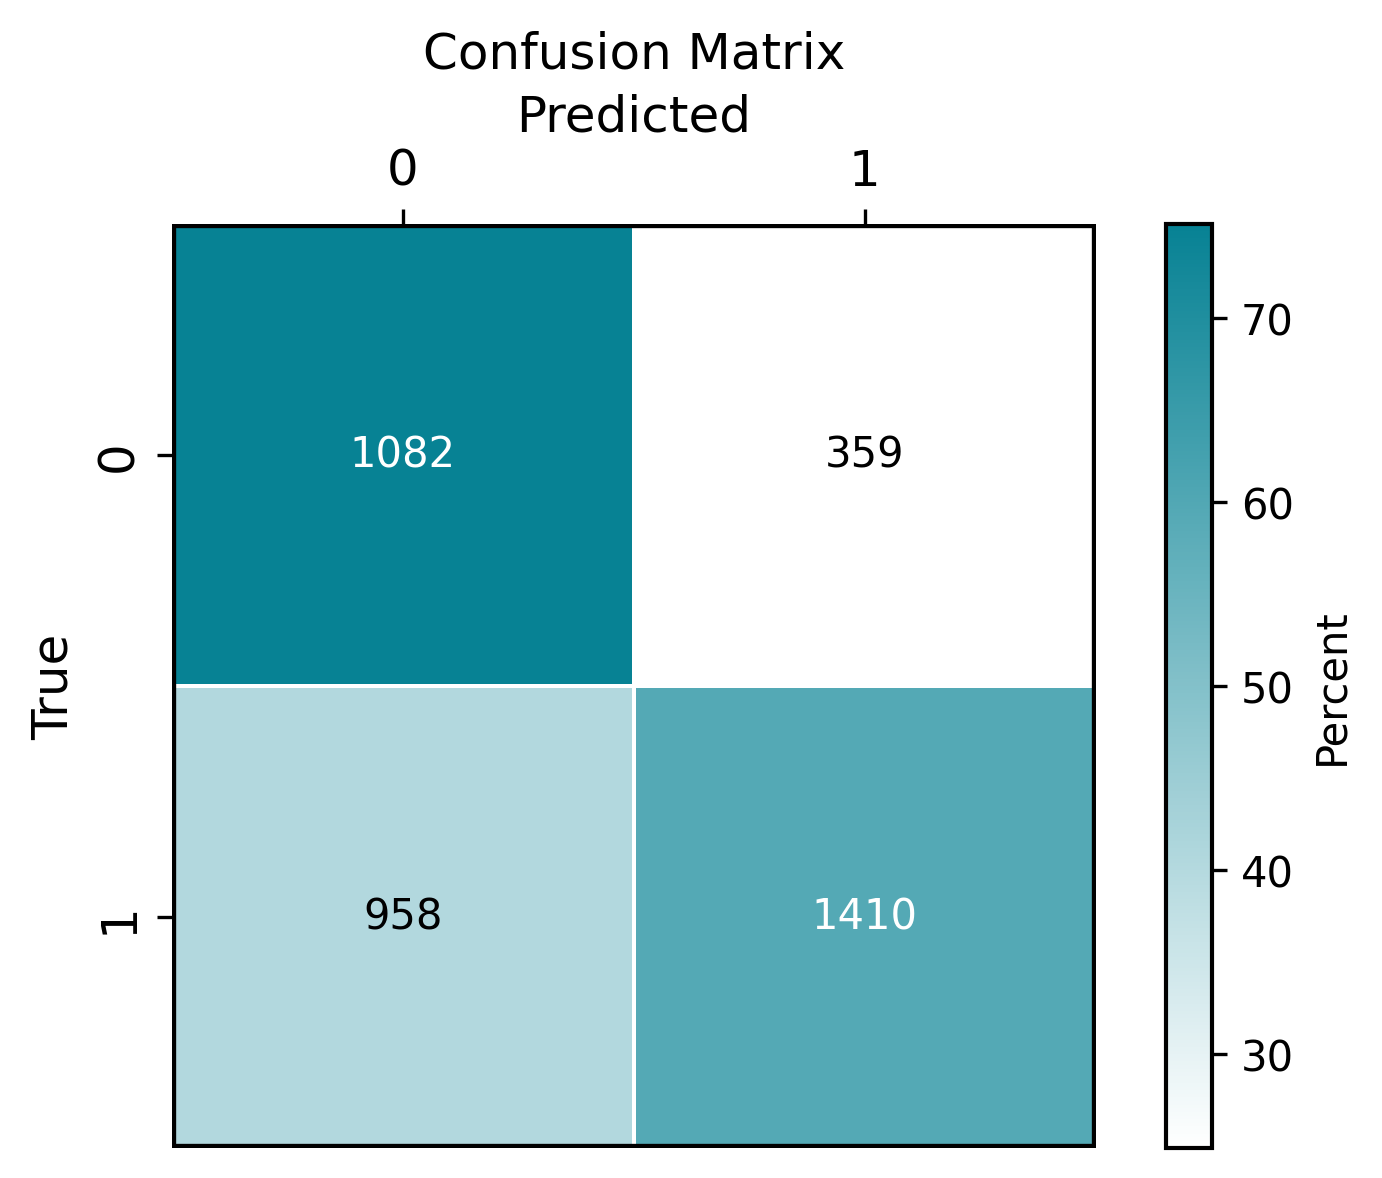

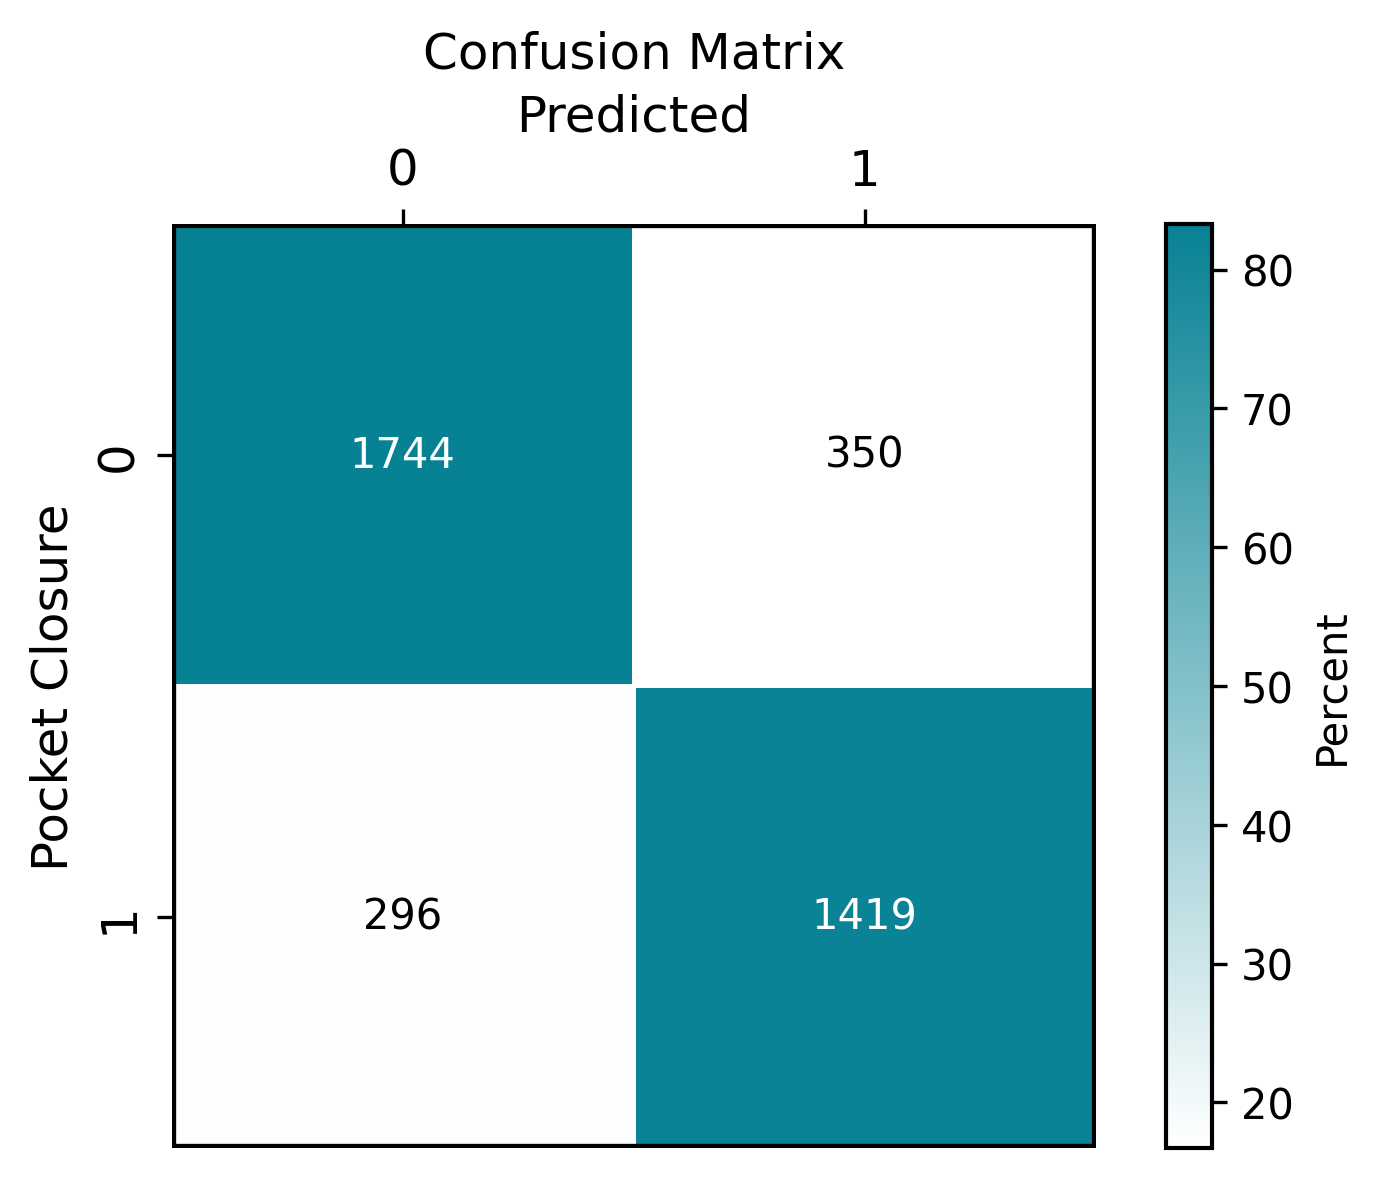

Average and Median Brier Scores by y:
   y      mean    median
0  0  0.189212  0.142227
1  1  0.223686  0.174781


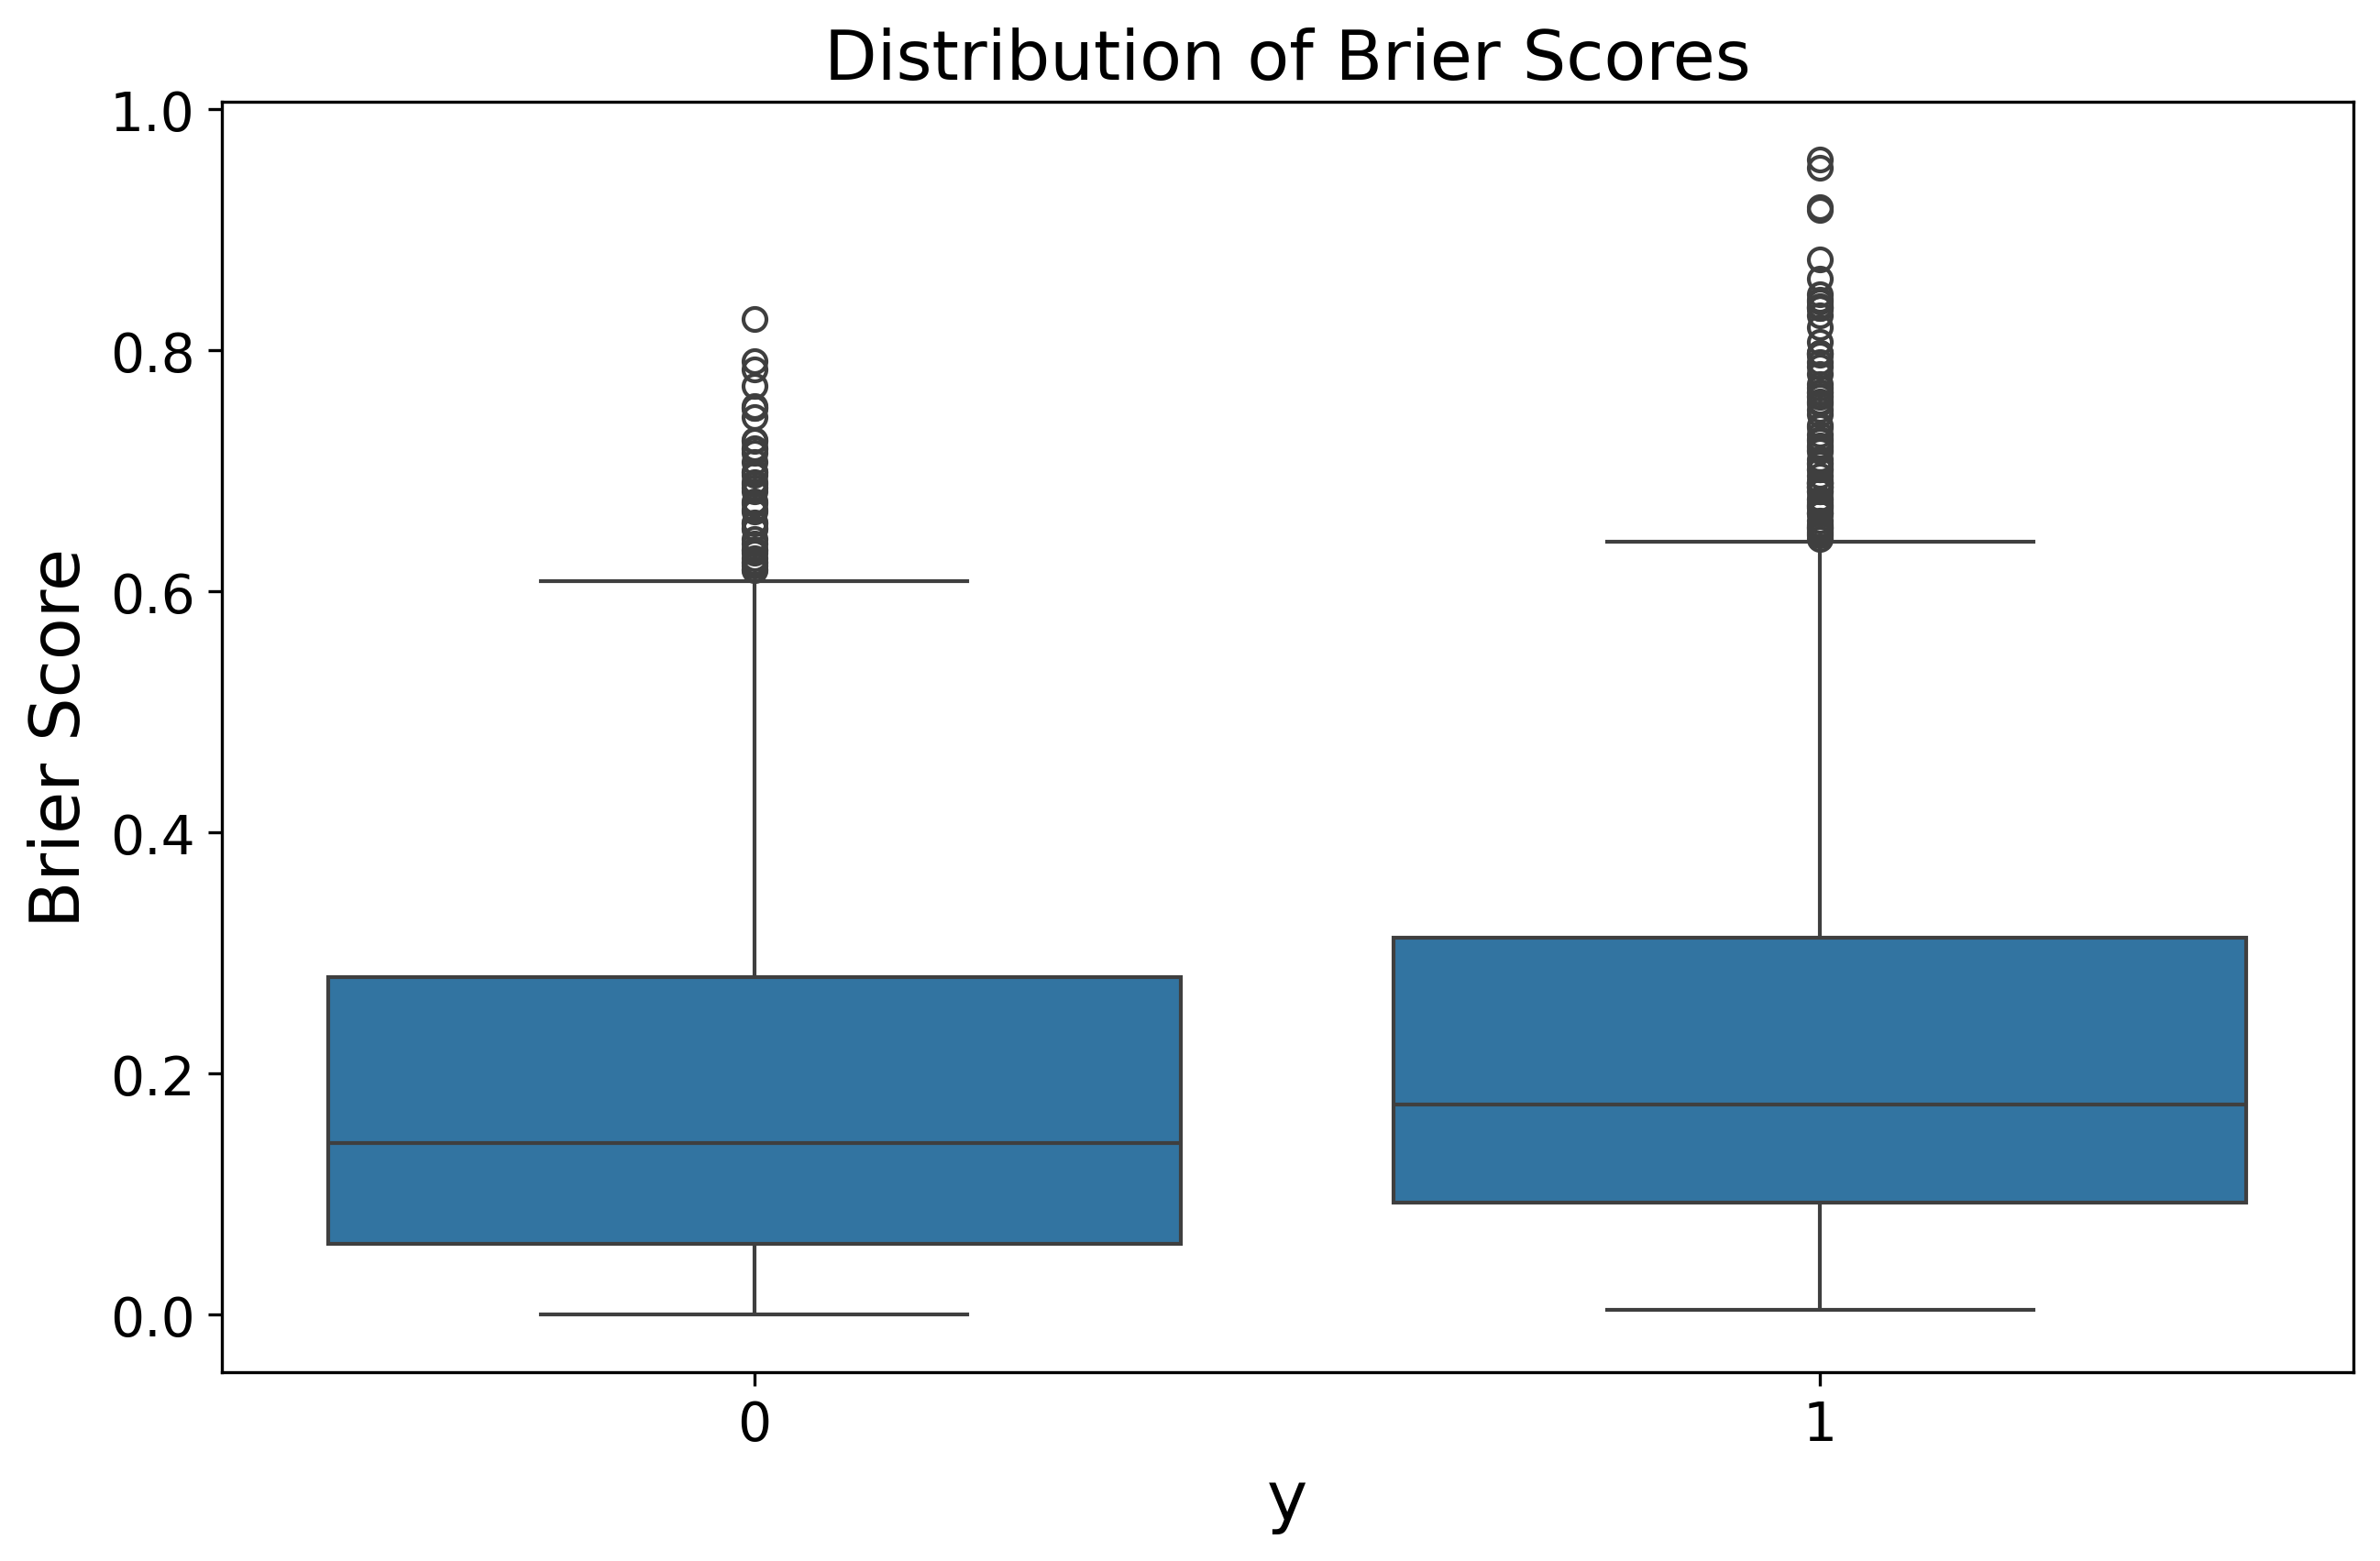


Mean Brier Score per cluster:
 Cluster
0    0.206869
1    0.221489
2    0.222976
Name: Brier_Score, dtype: float64 

Number of observations per cluster:
 Cluster
0    2883
1     362
2     564
Name: count, dtype: int64


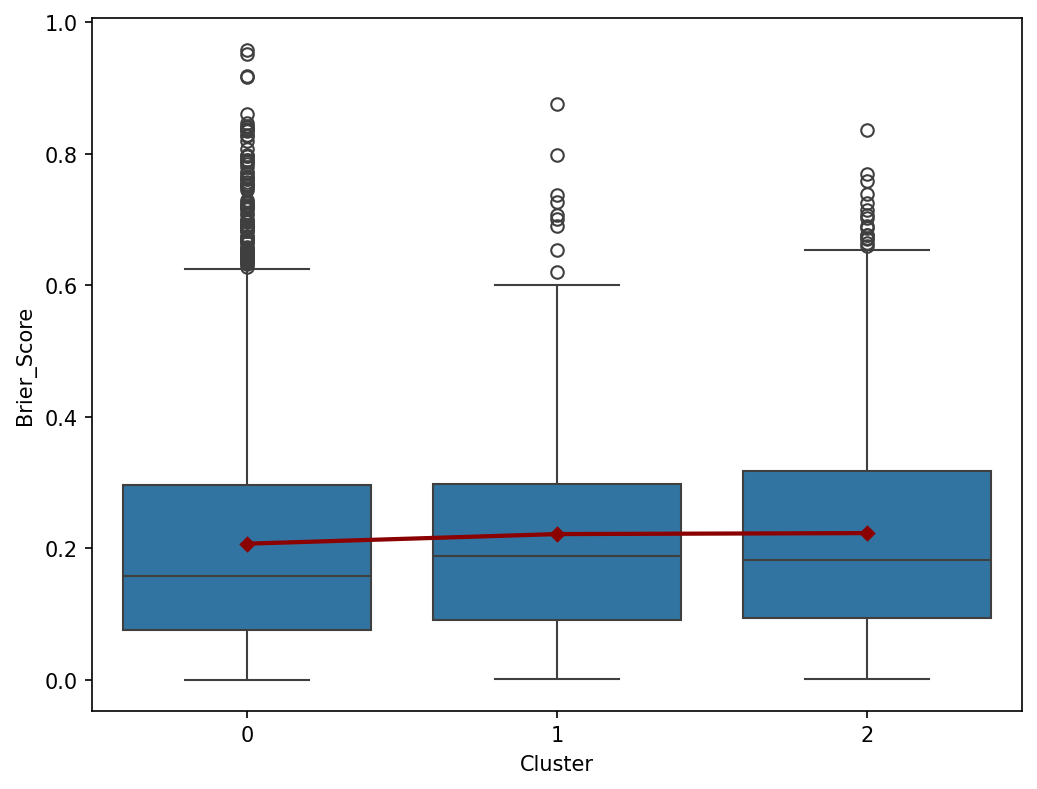

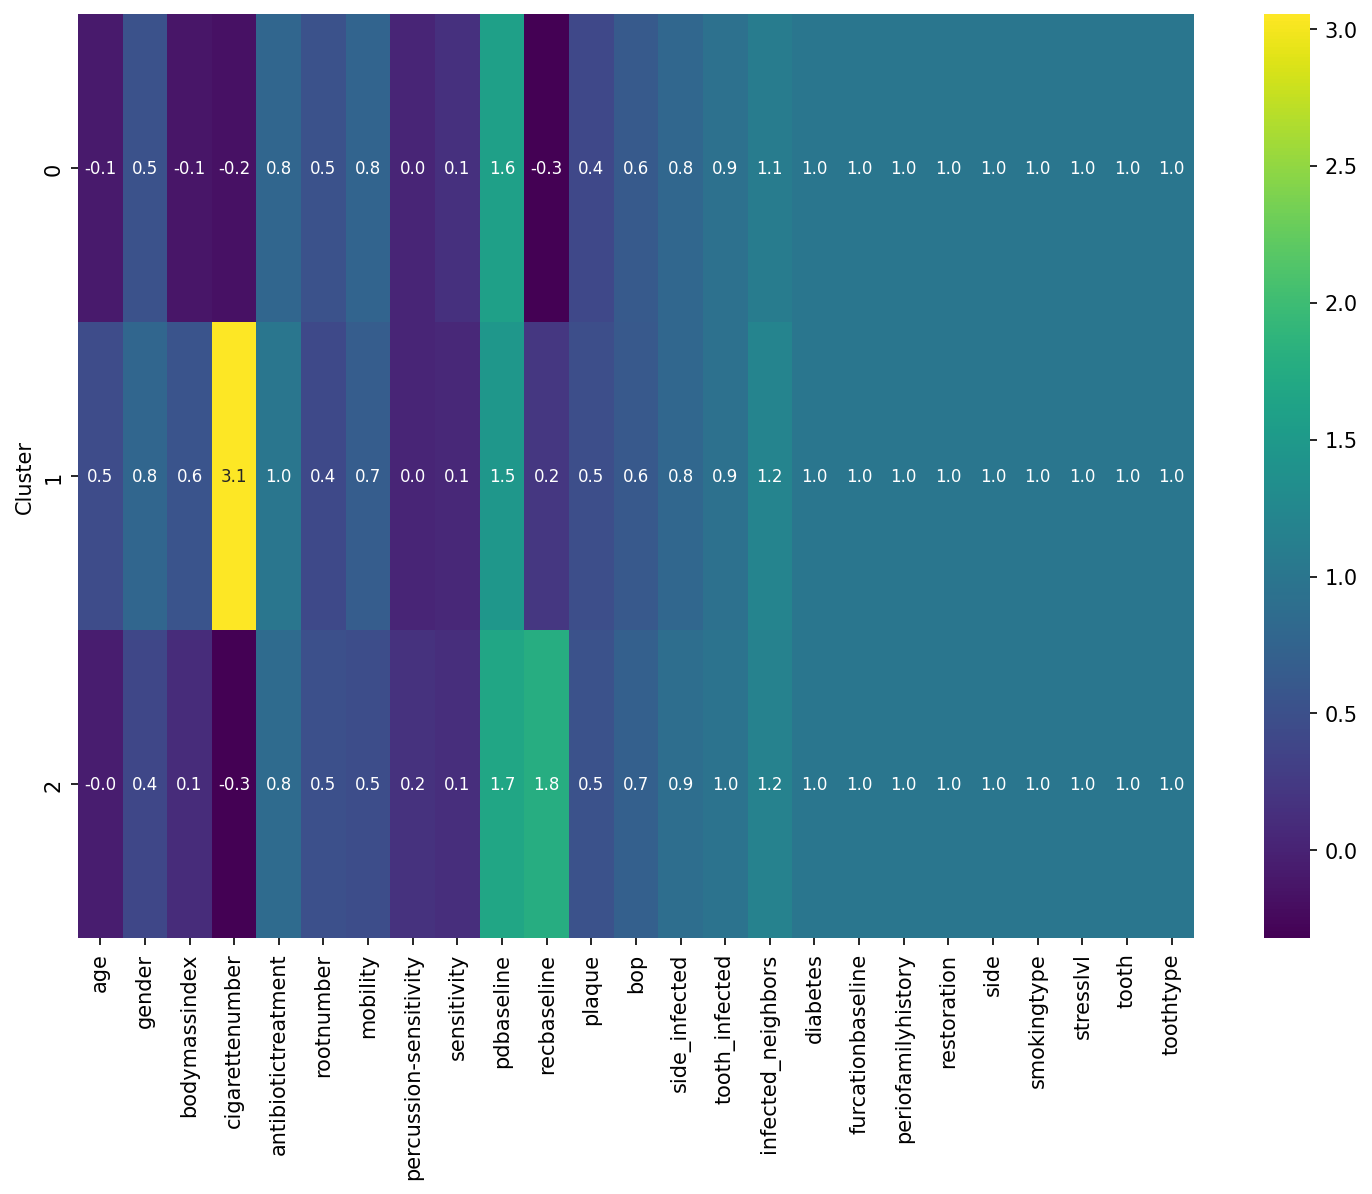

In [10]:
evaluator.wrapped_evaluation()